In [ ]:
# Accessing Google Drive

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('Dataset 1.0').sheet1

In [ ]:
rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})
df.head()

,Input,Output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x=df[['Input']].values
y=df[['Output']].values

In [ ]:
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 9.],
       [10.],
       [12.],
       [15.],
       [17.],
       [20.],
       [25.],
       [29.],
       [39.],
       [32.],
       [34.],
       [35.]])

In [ ]:
y

array([[ 11.],
       [ 21.],
       [ 31.],
       [ 41.],
       [ 51.],
       [ 61.],
       [ 71.],
       [ 91.],
       [101.],
       [121.],
       [151.],
       [171.],
       [201.],
       [251.],
       [291.],
       [301.],
       [321.],
       [341.],
       [351.]])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
scaler=MinMaxScaler()
scaler.fit(xtrain)

MinMaxScaler()

In [ ]:
xtrain1=scaler.transform(xtrain)

In [ ]:
model_1_0=Sequential([
    Dense(8,activation='relu'),
    Dense(15,activation='relu'),
    Dense(1)
])

In [ ]:
model_1_0.compile(optimizer='rmsprop',loss='mse')

In [ ]:
model_1_0.fit(xtrain1,ytrain,epochs=3000)

Epoch 1/3000
1/1 [==============================] - 0s 470ms/step - loss: 39498.0156
Epoch 2/3000
1/1 [==============================] - 0s 9ms/step - loss: 39483.1953
Epoch 3/3000
1/1 [==============================] - 0s 12ms/step - loss: 39472.2461
Epoch 4/3000
1/1 [==============================] - 0s 9ms/step - loss: 39462.9844
Epoch 5/3000
1/1 [==============================] - 0s 9ms/step - loss: 39454.6445
Epoch 6/3000
1/1 [==============================] - 0s 9ms/step - loss: 39446.8984
Epoch 7/3000
1/1 [==============================] - 0s 8ms/step - loss: 39439.5898
Epoch 8/3000
1/1 [==============================] - 0s 8ms/step - loss: 39432.6055
Epoch 9/3000
1/1 [==============================] - 0s 8ms/step - loss: 39425.8750
Epoch 10/3000
1/1 [==============================] - 0s 10ms/step - loss: 39419.3086
Epoch 11/3000
1/1 [==============================] - 0s 8ms/step - loss: 39412.8711
Epoch 12/3000
1/1 [==============================] - 0s 8ms/step - loss: 39406.56

In [ ]:
loss=pd.DataFrame(model_1_0.history.history)

<Axes: >

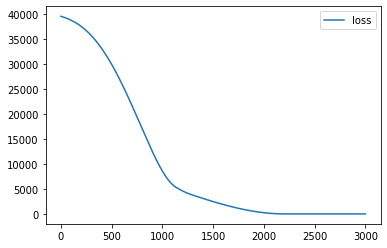

In [ ]:
loss.plot()

In [ ]:
xtest1=scaler.transform(xtest)

In [ ]:
model_1_0.evaluate(xtest1,ytest)

1/1 [==============================] - 0s 152ms/step - loss: 1360.7578


1360.7578125

In [ ]:
xn1=[[4]]

In [ ]:
xn1_1=scaler.transform(xn1)

In [ ]:
model_1_0.predict(xn1_1)

1/1 [==============================] - 0s 83ms/step


array([[41.097477]], dtype=float32)